In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import pickle
import nltk
from nltk import *
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.metrics import f1_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import RidgeClassifier
# from sklearn.neural_network import MLPClassifier
from time import time
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import randint as sp_randint
import xgboost as xgb
from xgboost import XGBClassifier
import scipy.sparse as sp
# from autosklearn.classification import AutoSklearnClassifier

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

def pickle_file(filename, obj):
    with open('dumps/' + filename, 'wb') as f:
        pickle.dump(obj, f)


def unpickle_file(filename):
    with open('dumps/' + filename, 'rb') as f:
        return pickle.load(f)
    
def preprocess(text):
# Remove punctuation, stopword and then stemmering
    stop = set(stopwords.words("english"))
    stemmer = stem.PorterStemmer()
    punctuation = set(string.punctuation)

    doc = [stemmer.stem(word) for word in nltk.word_tokenize(text) if (word not in punctuation) and (word not in stop)]

    doc = ' '.join(w for w in doc)
    return doc

def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)
    

In [7]:
data_train = pd.read_csv('data_train.csv', encoding='utf-8')

data_train["Summary"] = data_train["Summary"].apply(preprocess)

summaries_train = data_train['Summary'].as_matrix()

ydf = data_train.drop('Summary', axis = 1)
ydf = ydf.drop(ydf.columns[0], axis = 1)
ydf = ydf.drop(ydf.columns[0], axis = 1)
ydf = ydf.as_matrix()

tfidfVect = TfidfVectorizer()
tfidf = tfidfVect.fit_transform(summaries_train)

pickle_file('tfidf.dat', tfidf)
pickle_file('tfidf_vocab.dat', tfidfVect.vocabulary_)
pickle_file('ydf.dat', ydf)



In [3]:
tfidf_vocab = TfidfVectorizer(decode_error="replace",vocabulary=unpickle_file('tfidf_vocab.dat'))
tfidf_train = unpickle_file('tfidf.dat')
ydf = unpickle_file('ydf.dat')
X_train = tfidf_train
y_train = ydf

In [47]:
def train_linear_svc(features_train, labels_train):
    print ("Training linear SVC")
    clf = LinearSVC(C=1, dual=True, class_weight='balanced')
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf


def train_randomForest(features_train, labels_train):
    print ("Training random forest")
    clf = RandomForestClassifier(n_estimators=70, max_depth=70)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_decisionTree(features_train, labels_train):
    print ("Training decision tree")
    clf = tree.DecisionTreeClassifier()
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_adaboost_decision_tree(features_train, labels_train):
    print ("Training adaboost decision tree")
    clf = AdaBoostClassifier( tree.DecisionTreeClassifier(max_depth=5),
                              n_estimators=600,
                              learning_rate=1)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_autosklearn(features_train, labels_train):
    print ("Training automl")
    clf = autosklearn.classification.AutoSklearnClassifier()
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf


def train_SGD_l1(features_train, labels_train):
    print ("Training SGD l1")
    clf = SGDClassifier(alpha=.0001, n_iter=50, penalty="l1")
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf
                        
def train_SGD_l2(features_train, labels_train):
    print ("Training SGD l2")
    clf = SGDClassifier(alpha=.0001, n_iter=50, penalty="l2")
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_SGD_elasticnet(features_train, labels_train):
    print ("Training SGD elascticnet")
    clf = SGDClassifier(alpha=.0001, n_iter=50, penalty="elasticnet")
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_PassiveAggressiveClassifier(features_train, labels_train):
    print ("Training PassiveAggressiveClassifier")
    clf = PassiveAggressiveClassifier(n_iter=50)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_RidgeClassifier(features_train, labels_train):
    print ("Training RidgeClassifier")
    clf = RidgeClassifier(tol=1e-2, solver="sag")
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_KNeighborsClassifier(features_train, labels_train):
    print ("Training KNeighborsClassifier")
    clf = KNeighborsClassifier(n_neighbors=10)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_MultinomialNB(features_train, labels_train):
    print ("Training MultinomialNB")
    clf = MultinomialNB(alpha=.01)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_BernoulliNB(features_train, labels_train):
    print ("Training BernoulliNB")
    clf = BernoulliNB(alpha=.01)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_MLP(features_train, labels_train):
    print ("Training MLP")
    clf = MLPClassifier(random_state=0, max_iter=400)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_NearestCentroid(features_train, labels_train):
    print ("Training NearestCentroid")
    clf = NearestCentroid()
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_xgboost(features_train, labels_train):
    print ("Training xgboost 2")
    clf = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
    #clf.fit(features_train, labels_train)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf
    
    
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

def grid_search_forest(X, y):
    clf = RandomForestClassifier(n_estimators=70)

    # Utility function to report best scores
 
    # use a full grid over all parameters
    param_grid = {"max_depth": [3, None],
                  "max_features": [1, 3, 10],
                  "min_samples_split": [2, 3, 4, 5, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}

    # run grid search
    grid_search = GridSearchCV(clf, param_grid=param_grid)
    start = time()
    grid_search.fit(X, y)

    print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
          % (time() - start, len(grid_search.cv_results_['params'])))
    report(grid_search.cv_results_)

                        

In [5]:
data_test = pd.read_csv('data_test.csv', encoding='utf-8')

data_test["Summary"] = data_test["Summary"].apply(preprocess)

summaries_test = data_test['Summary'].as_matrix()

transformer = TfidfTransformer()
tfidf_test = transformer.fit_transform(tfidf_vocab.fit_transform(summaries_test))
pickle_file('tfidf_test.dat', tfidf_test)
# tfidf_test = unpickle_file('tfidf_test.dat')
X_test = tfidf_test


ydf_test = pd.read_csv('labels_test.csv', encoding='utf-8')
target_names = list(ydf_test.columns.values)
del target_names[0]
ydf_test = ydf_test.drop(ydf_test.columns[0], axis = 1)
ydf_test = ydf_test.as_matrix()
pickle_file('ydf_test.dat', ydf_test)
# ydf_test = unpickle_file('ydf_test.dat')

In [34]:
draw_roc_tab = []

def benchmark(clf, name):  
    t0 = time() 
    if name == 'xgboost':
        pred = clf.predict(sp.hstack((X_test, sp.csr_matrix(np.ones((X_test.shape[0],1))))))
    else:
        pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    
    score_hamming = hamming_score(ydf_test, pred)    
    f1_micro = f1_score(ydf_test, pred, average="micro")
    f1_macro = f1_score(ydf_test, pred, average="macro")
    f1_weighted = f1_score(ydf_test, pred, average="weighted")
    f1_samples = f1_score(ydf_test, pred, average="samples")
    
    print('F1-Score with micro compute: {0}'.format(f1_micro))
    print('F1-Score with macro compute: {0}'.format(f1_macro))
    print('F1-Score with weighted compute: {0}'.format(f1_weighted))
    print('F1-Score with samples compute: {0}'.format(f1_samples))
    print('Hamming score: {0}'.format(score_hamming))
    print "\n"
    print classification_report(ydf_test, pred, target_names=target_names)
    
    draw_roc_tab.append((ydf_test, pred, name))
    return name, score_hamming, f1_micro, f1_macro, f1_weighted, f1_samples



def draw_ROC(y_real_and_y_pedit_and_clf_name_list):
    """ y_test_and_y_score: une liste de y_test et y_score.
        [(y_test, y_score, name), (y_test, y_score, name),...]
        y_test est label réal
        y_score est label prédit 
        name est le nom de classification
       """
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc
    from scipy import interp
    # Plot all ROC curves
    plt.figure()
    for y_test, y_score, name in y_real_and_y_pedit_and_clf_name_list:
        n_classes = y_score.shape[1]
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        # Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        plt.plot(fpr["micro"], tpr["micro"],
                 label = name + ' micro ROC (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),  linewidth=2)
        plt.plot(fpr["macro"], tpr["macro"],
                 label = name + ' macro ROC (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),  linewidth=2)

        #for i in range(n_classes):
        #    plt.plot(fpr[i], tpr[i], lw=2,
        #    label='ROC curve of {0} (area = {1:0.2f})'
        #             ''.format(data.columns.values[i+2], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-labels')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

results = []

In [35]:
# print y_train.shape
# print ydf_test.shape
# svm_classifier_linear = train_linear_svc(X_train, y_train)
# pickle_file('svm_classifier_linear', svm_classifier_linear)
svm_classifier_linear = unpickle_file('svm_classifier_linear')
results.append(benchmark(svm_classifier_linear, 'svm_classifier_linear'))

test time:  0.151s
F1-Score with micro compute: 0.547748086983
F1-Score with macro compute: 0.485728442129
F1-Score with weighted compute: 0.541790444623
F1-Score with samples compute: 0.520931701618
Hamming score: 0.436194156025


                 precision    recall  f1-score   support

          drama       0.74      0.71      0.73     11088
         action       0.55      0.50      0.53      3786
      adventure       0.52      0.46      0.49      3435
      animation       0.70      0.63      0.67      1376
          crime       0.51      0.44      0.47      2825
        fantasy       0.46      0.31      0.37      1227
          music       0.39      0.28      0.33      1519
        musical       0.37      0.25      0.29      1374
        mystery       0.36      0.25      0.30      1171
        romance       0.47      0.36      0.41      3759
science fiction       0.73      0.54      0.62      1313
          sport       0.64      0.33      0.43       359
       thriller       0.56

In [ ]:
# random_forest = train_randomForest(X_train, y_train)
# pickle_file('random_forest', random_forest)
random_forest = unpickle_file('random_forest')
results.append(benchmark(random_forest, 'random_forest'))

In [36]:
# decision_tree = train_decisionTree(X_train, y_train)
# pickle_file('decision_tree', decision_tree)
decision_tree = unpickle_file('decision_tree')
results.append(benchmark(decision_tree, 'decision_tree'))

test time:  0.534s
F1-Score with micro compute: 0.434843411728
F1-Score with macro compute: 0.348845981173
F1-Score with weighted compute: 0.420856287426
F1-Score with samples compute: 0.41411466388
Hamming score: 0.330179346349


                 precision    recall  f1-score   support

          drama       0.65      0.69      0.67     11088
         action       0.45      0.34      0.39      3786
      adventure       0.38      0.29      0.33      3435
      animation       0.44      0.43      0.43      1376
          crime       0.40      0.32      0.36      2825
        fantasy       0.30      0.22      0.25      1227
          music       0.25      0.18      0.21      1519
        musical       0.19      0.13      0.15      1374
        mystery       0.22      0.16      0.18      1171
        romance       0.35      0.21      0.26      3759
science fiction       0.52      0.50      0.51      1313
          sport       0.33      0.26      0.29       359
       thriller       0.43 

In [ ]:
# adaboost_decision_tree = train_adaboost_decision_tree(X_train, y_train)
# pickle_file('adaboost_decision_tree', adaboost_decision_tree)
adaboost_decision_tree = unpickle_file('adaboost_decision_tree')
results.append(benchmark(adaboost_decision_tree, 'adaboost_decision_tree'))

In [46]:
# import os

# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.1.0-posix-seh-rt_v5-rev0\\mingw64\\bin'

xgboost = train_xgboost(X_train, y_train)
pickle_file('xgboost', xgboost)
# xgboost = unpickle_file('xgboost')
results.append(benchmark(xgboost, 'xgboost'))

Training xgboost 2
test time:  39.974s
F1-Score with micro compute: 0.549014860325
F1-Score with macro compute: 0.442679972579
F1-Score with weighted compute: 0.519570839292
F1-Score with samples compute: 0.523017003186
Hamming score: 0.449018627919


                 precision    recall  f1-score   support

          drama       0.75      0.79      0.77     11088
         action       0.68      0.39      0.50      3786
      adventure       0.65      0.34      0.45      3435
      animation       0.68      0.53      0.60      1376
          crime       0.68      0.37      0.48      2825
        fantasy       0.56      0.21      0.31      1227
          music       0.58      0.16      0.25      1519
        musical       0.57      0.13      0.21      1374
        mystery       0.49      0.16      0.25      1171
        romance       0.65      0.24      0.35      3759
science fiction       0.79      0.45      0.57      1313
          sport       0.68      0.30      0.42       359
      

In [37]:
# SGD_l1 = train_SGD_l1(X_train, y_train)
# pickle_file('SGD_l1.dat', SGD_l1)
SGD_l1 = unpickle_file('SGD_l1.dat')
results.append(benchmark(SGD_l1, 'SGD_l1'))

test time:  0.142s
F1-Score with micro compute: 0.430636289497
F1-Score with macro compute: 0.205359544267
F1-Score with weighted compute: 0.328524891927
F1-Score with samples compute: 0.441312855552
Hamming score: 0.380665950591


                 precision    recall  f1-score   support

          drama       0.71      0.87      0.78     11088
         action       0.74      0.13      0.23      3786
      adventure       0.69      0.05      0.09      3435
      animation       0.87      0.28      0.42      1376
          crime       0.71      0.11      0.19      2825
        fantasy       0.80      0.00      0.01      1227
          music       0.38      0.00      0.00      1519
        musical       0.25      0.00      0.00      1374
        mystery       0.59      0.02      0.03      1171
        romance       0.55      0.02      0.04      3759
science fiction       0.84      0.28      0.42      1313
          sport       0.77      0.06      0.12       359
       thriller       0.73

In [ ]:
SGD_l2 = train_SGD_l2(X_train, y_train)
# pickle_file('SGD_l2', SGD_l2)
# SGD_l2 = unpickle_file('SGD_l2')
results.append(benchmark(SGD_l2, 'SGD_l2'))

Training SGD l2


In [39]:
SGD_elasticnet = train_SGD_elasticnet(X_train, y_train)
# pickle_file('SGD_elasticnet', SGD_elasticnet)
# SGD_elasticnet = unpickle_file('SGD_elasticnet')
results.append(benchmark(SGD_elasticnet, 'SGD_elasticnet'))

Training SGD elascticnet
test time:  0.137s
F1-Score with micro compute: 0.451017338842
F1-Score with macro compute: 0.240303875894
F1-Score with weighted compute: 0.363462515398
F1-Score with samples compute: 0.453530071873
Hamming score: 0.392242013765


                 precision    recall  f1-score   support

          drama       0.73      0.85      0.78     11088
         action       0.76      0.19      0.30      3786
      adventure       0.76      0.10      0.17      3435
      animation       0.90      0.35      0.50      1376
          crime       0.74      0.13      0.23      2825
        fantasy       0.81      0.01      0.03      1227
          music       0.71      0.01      0.01      1519
        musical       0.00      0.00      0.00      1374
        mystery       0.77      0.02      0.04      1171
        romance       0.68      0.04      0.08      3759
science fiction       0.89      0.28      0.43      1313
          sport       0.90      0.08      0.14       359
 

In [32]:
PassiveAggressiveClassifier = train_PassiveAggressiveClassifier(X_train, y_train)
# pickle_file('PassiveAggressiveClassifier', PassiveAggressiveClassifier)
# PassiveAggressiveClassifier = unpickle_file('PassiveAggressiveClassifier')
results.append(benchmark(PassiveAggressiveClassifier, 'PassiveAggressiveClassifier'))

Training PassiveAggressiveClassifier


TypeError: 'OneVsRestClassifier' object is not callable

In [28]:
RidgeClassifier = train_RidgeClassifier(X_train, y_train)
# pickle_file('RidgeClassifier', RidgeClassifier)
# RidgeClassifier = unpickle_file('RidgeClassifier')
results.append(benchmark(RidgeClassifier, 'RidgeClassifier'))

Training RidgeClassifier


TypeError: 'OneVsRestClassifier' object is not callable

In [ ]:
# KNeighborsClassifier = train_KNeighborsClassifier(X_train, y_train)
# pickle_file('KNeighborsClassifier', KNeighborsClassifier)
KNeighborsClassifier = unpickle_file('KNeighborsClassifier')
results.append(benchmark(KNeighborsClassifier, 'KNeighborsClassifier'))

In [ ]:
# MultinomialNB = train_MultinomialNB(X_train, y_train)
# pickle_file('MultinomialNB', MultinomialNB)
MultinomialNB = unpickle_file('MultinomialNB')
results.append(benchmark(MultinomialNB, 'MultinomialNB'))

In [48]:
BernoulliNB = train_BernoulliNB(X_train, y_train)
# pickle_file('BernoulliNB', BernoulliNB)
# BernoulliNB = unpickle_file('BernoulliNB')
results.append(benchmark(BernoulliNB, 'BernoulliNB'))

Training BernoulliNB


TypeError: 'OneVsRestClassifier' object is not callable

In [ ]:
# MLP = train_MLP(X_train, y_train)
# pickle_file('MLP', MLP)
MLP = unpickle_file('MLP')
results.append(benchmark(MLP, 'MLP'))

In [22]:
automl = train_autosklearn(X_train, y_train)
results.append(benchmark(automl, 'automl'))

Training automl


NameError: global name 'autosklearn' is not defined

In [42]:
draw_roc_tab

[(array([[0, 0, 1, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 1, ..., 0, 0, 0],
         ..., 
         [1, 0, 0, ..., 1, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
         [0, 1, 1, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0]]), 'svm_classifier_linear'),
 (array([[0, 0, 1, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 1, ..., 0, 0, 0],
         ..., 
         [1, 0, 0, ..., 1, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0]]), array([[0, 1, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0],
         [1, 0, 1, ..., 0, 0, 0],
         ..., 
         [1, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0]]), 'decision_tree'),
 (array([[0, 0, 1, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
        

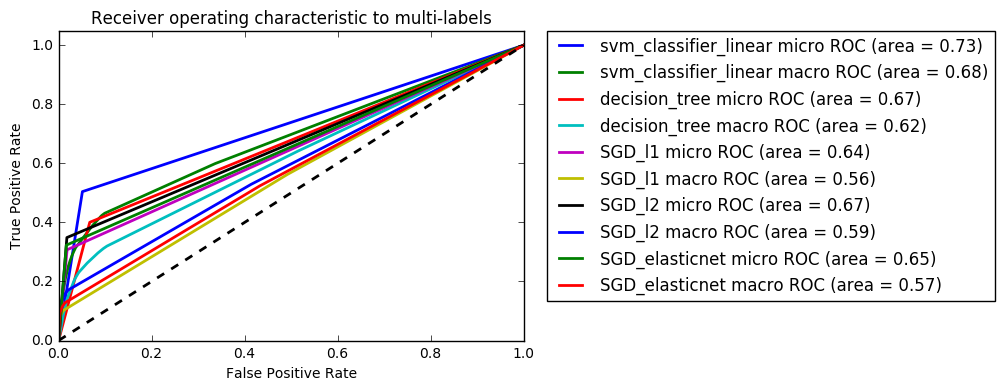

In [43]:
draw_ROC(draw_roc_tab)

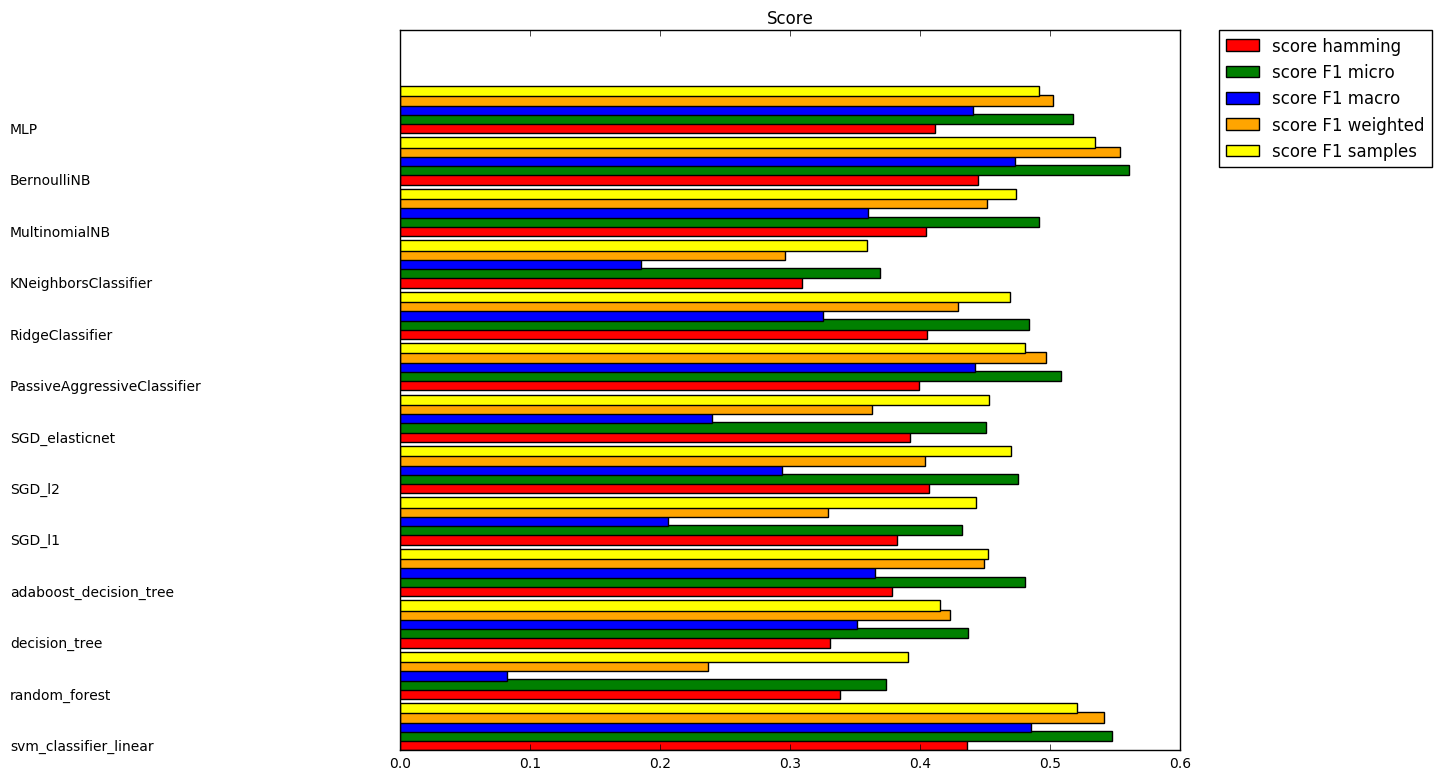

In [55]:
%matplotlib inline

indices = np.arange(len(results))

results_final = [[x[i] for x in results] for i in range(6)]
width = 0.18  
clf_names, score_hamming,f1_micro, f1_macro, f1_weighted, f1_samples = results_final
# test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score_hamming, .2, label="score hamming", color='red')
plt.barh(indices + width, f1_micro, .2, label="score F1 micro", color='green')
plt.barh(indices + 2*width, f1_macro, .2, label="score F1 macro", color='blue')
plt.barh(indices + 3*width, f1_weighted, .2, label="score F1 weighted", color='orange')
plt.barh(indices + 4*width, f1_samples, .2, label="score F1 samples", color='yellow')
# plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()